In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import torch
import torchvision
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append('../')
import dataset
from loss import YOLOv1Loss
from model import ResNet18YOLOv1

In [107]:
pascal_voc_train = torchvision.datasets.VOCDetection(
    root="../data",
    year="2007",
    image_set="train",
    download=False
)

In [108]:
voc_train = dataset.PascalVOC(pascal_voc=pascal_voc_train)

TRANSFORMING PASCAL VOC


In [109]:
data = voc_train[0]
data = (data[0].unsqueeze(0), data[1].unsqueeze(0))

data[0].shape, data[1].shape

(torch.Size([1, 3, 448, 448]), torch.Size([1, 7, 7, 25]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


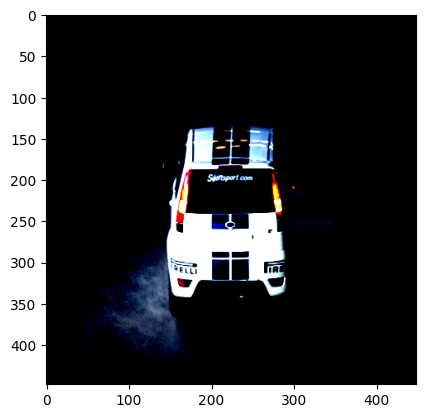

In [110]:
img = data[0].squeeze(0).permute((1, 2, 0))

plt.imshow(img)

In [111]:
device = "cpu"
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device("mps")

device

device(type='mps')

In [101]:
# hyperparameters
S = 7
B = 2
C = 20
lambda_coord = 5
lambda_noobj = 0.5

In [102]:
yolo = ResNet18YOLOv1(
    S=7,
    B=2,
    C=20
)

yolo = yolo.to(device)

In [103]:
yolo_loss = YOLOv1Loss(
    S=S,
    B=B,
    C=20,
    lambda_coord=lambda_coord,
    lambda_noobj=lambda_noobj
)

optimizer = torch.optim.SGD(yolo.parameters(), lr=1e-4, weight_decay=0.0005, momentum=0.9)

In [104]:
EPOCHS = 10

In [105]:
print("TRAINING")

yolo.train()

for epoch in tqdm(range(EPOCHS)):
    X, Y = data
    X = X.to(device)
    Y = Y.to(device)
    
    pred = yolo(X)
    loss = yolo_loss(pred, Y)
    
    # backprop
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    print(f"EPOCH {epoch + 1}: Loss={loss}")

TRAINING


 10%|████▍                                       | 1/10 [00:00<00:01,  5.21it/s]

CALCULATING YOLO LOSS
EPOCH 1: Loss=17.40447425842285
CALCULATING YOLO LOSS


 30%|█████████████▏                              | 3/10 [00:00<00:00,  9.62it/s]

EPOCH 2: Loss=16.291179656982422
CALCULATING YOLO LOSS
EPOCH 3: Loss=14.445462226867676
CALCULATING YOLO LOSS
EPOCH 4: Loss=12.010624885559082
CALCULATING YOLO LOSS


 70%|██████████████████████████████▊             | 7/10 [00:00<00:00, 12.25it/s]

EPOCH 5: Loss=10.534546852111816
CALCULATING YOLO LOSS
EPOCH 6: Loss=8.749700546264648
CALCULATING YOLO LOSS
EPOCH 7: Loss=7.007583141326904
CALCULATING YOLO LOSS


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 11.75it/s]

EPOCH 8: Loss=5.145351886749268
CALCULATING YOLO LOSS
EPOCH 9: Loss=4.377708435058594
CALCULATING YOLO LOSS
EPOCH 10: Loss=3.1612043380737305
